# Implied volatity prediction 

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Data 

In [3]:
!ls ../data/

spots_iv_index_spx_ai_daily.xlsx   spots_iv_index_sx5e_ai_weekly.xlsx
spots_iv_index_spx_ai_weekly.xlsx  spx_daily.xlsx
spots_iv_index_sx5e_ai_daily.xlsx  sx5e_daily.xlsx


### spots_iv_index_spx_ai_daily

In [5]:
import sys, os 

p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.append(p)

In [6]:
from implied_vol_prediction.src.data import open_and_transform_csv2

sx5e_daily = open_and_transform_csv2(r'../data/sx5e_daily.xlsx')

In [7]:
sx5e_daily.isnull().sum()

Dates                    0
Spot t                   0
Spot t-1                 0
Volatility               0
Duration                 0
Strike                   0
Implied_vol              0
Change_in_implied_vol    0
dtype: int64

In [8]:
pd.unique(sx5e_daily.Duration.values), pd.unique(sx5e_daily.Strike.values)

(array(['6M', '1Y', '18M', '2Y', '3Y'], dtype=object),
 array([ 40,  60,  80,  90, 100, 110, 120]))

## EDA with spots_iv_index_spx - daily 

In [9]:
strikes = list(np.unique(sx5e_daily.Strike.values))
durations = ['6M','1Y','18M','2Y','3Y']

strikes, durations

([40, 60, 80, 90, 100, 110, 120], ['6M', '1Y', '18M', '2Y', '3Y'])

Strike = 40, Duration = 6M


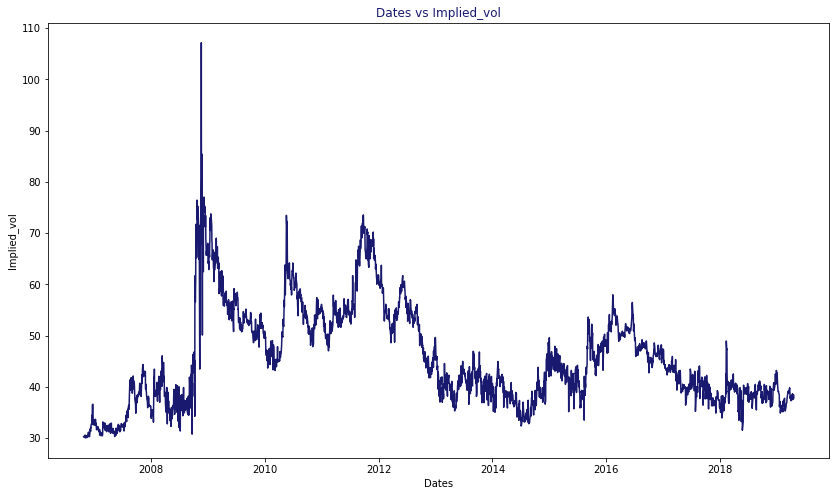

Strike = 40, Duration = 1Y


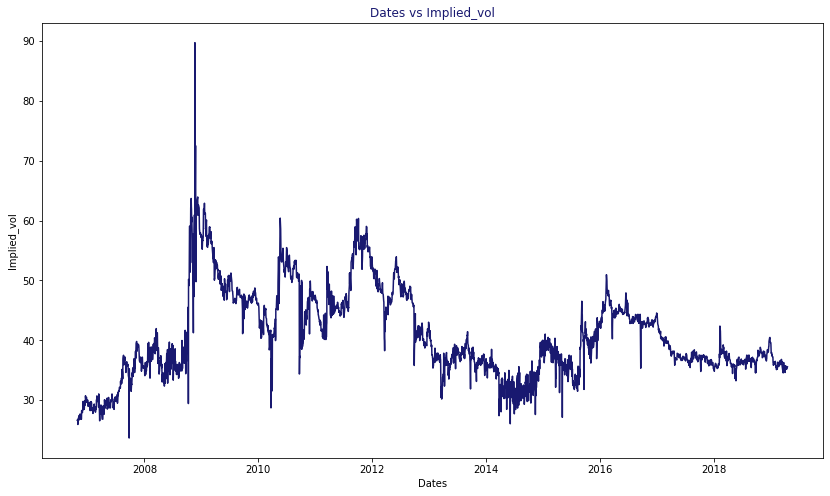

Strike = 40, Duration = 18M


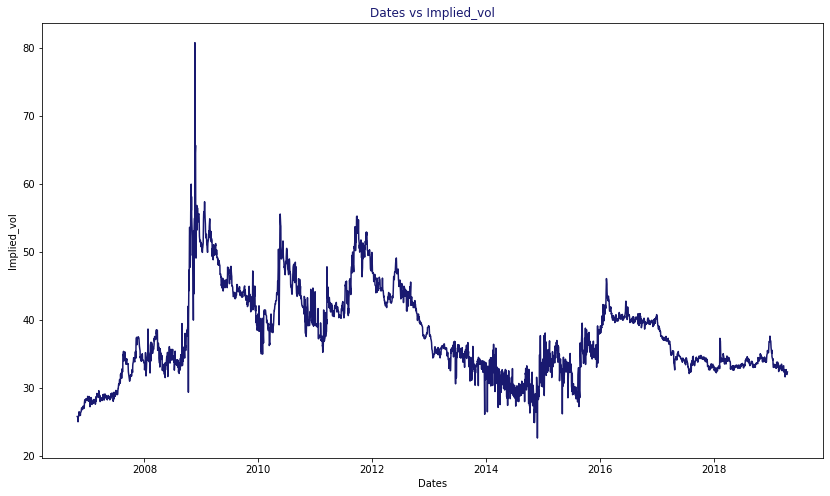

Strike = 40, Duration = 2Y


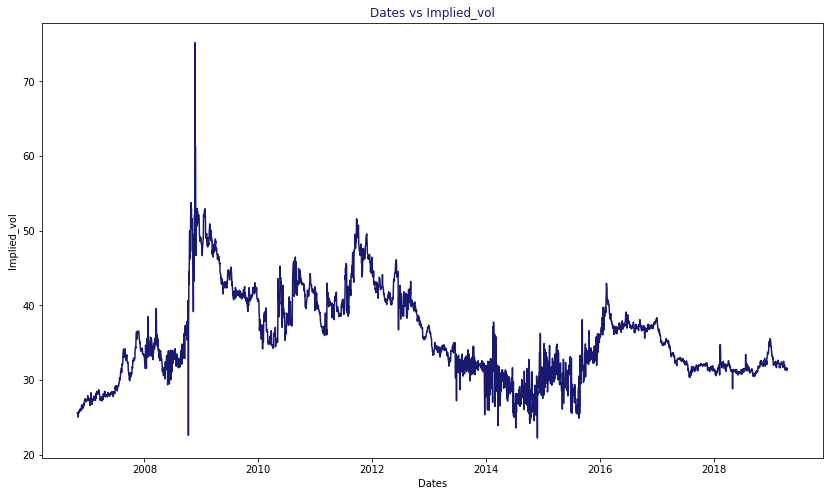

Strike = 40, Duration = 3Y


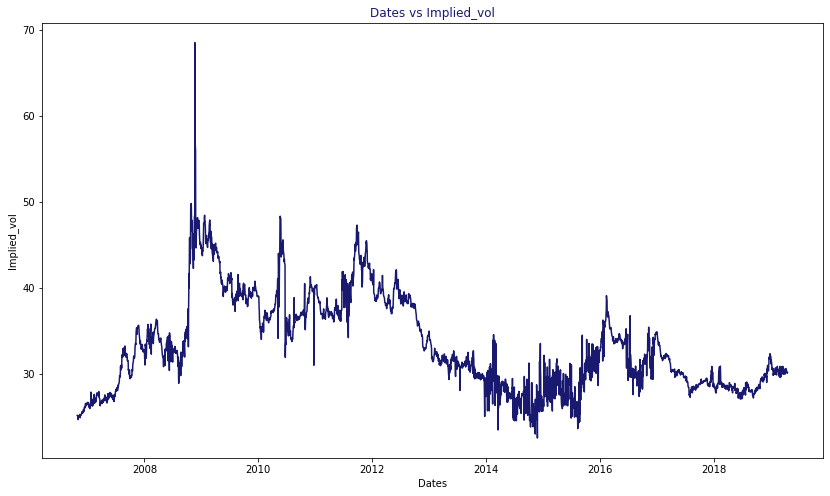

Strike = 60, Duration = 6M


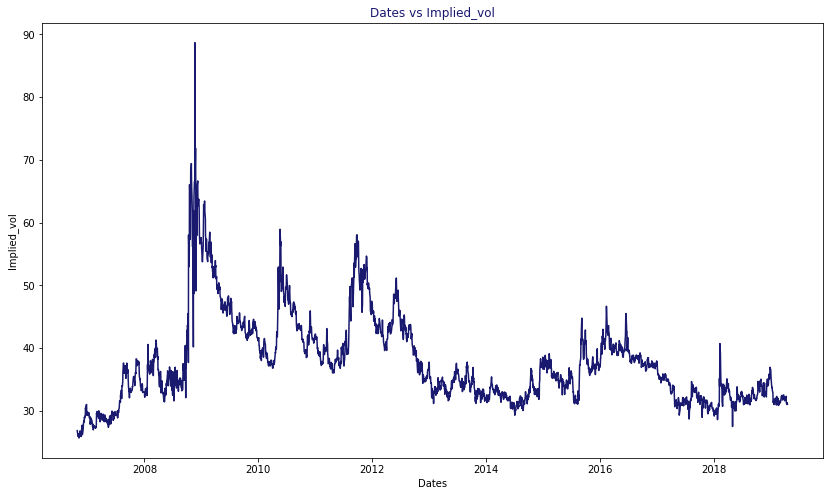

Strike = 60, Duration = 1Y


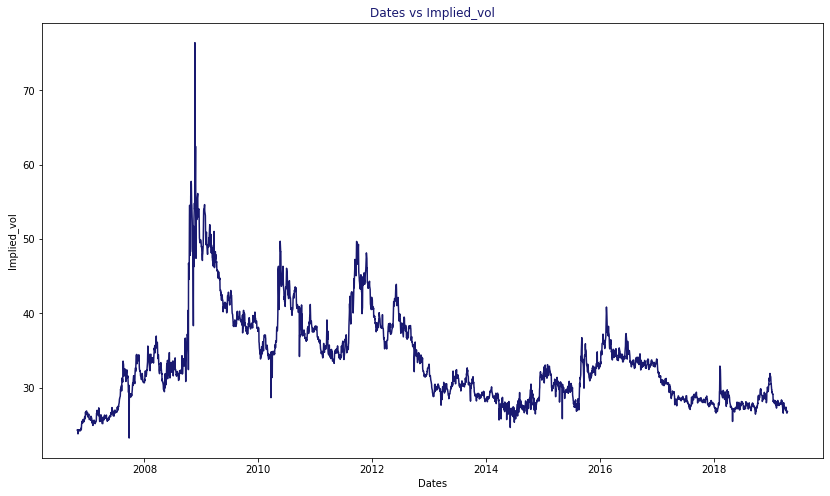

Strike = 60, Duration = 18M


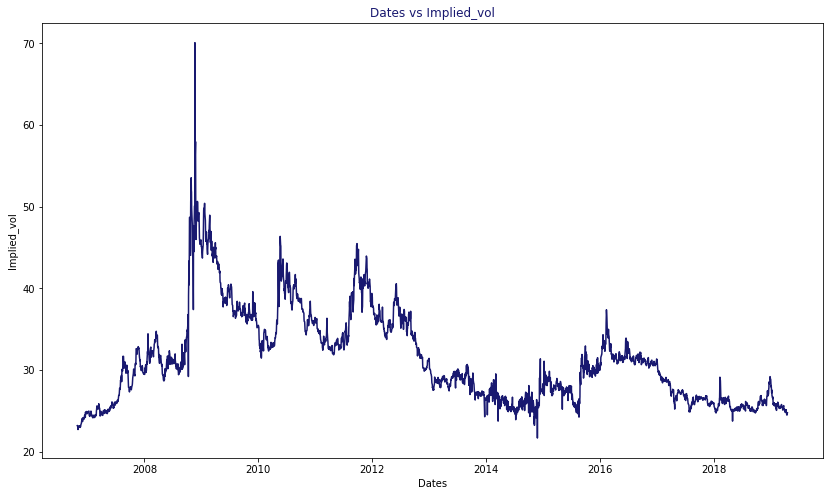

Strike = 60, Duration = 2Y


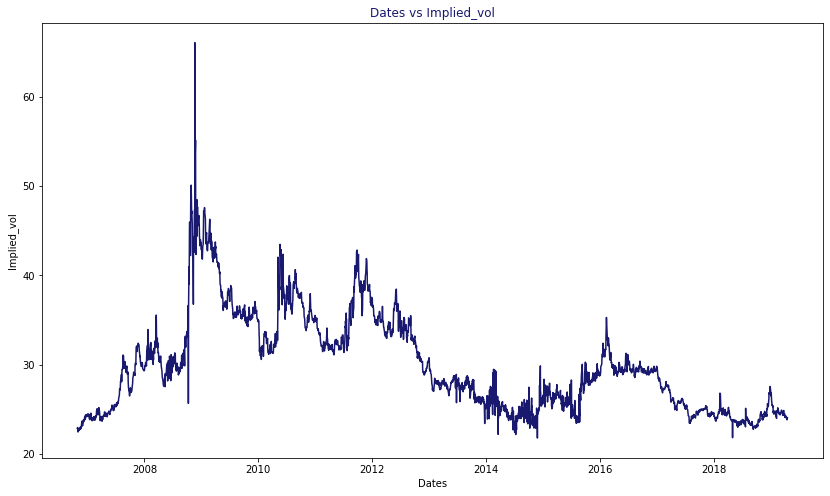

Strike = 60, Duration = 3Y


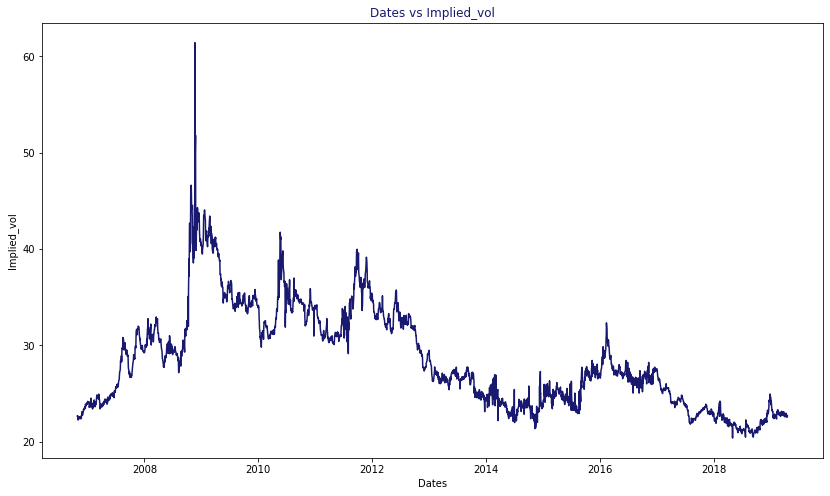

Strike = 80, Duration = 6M


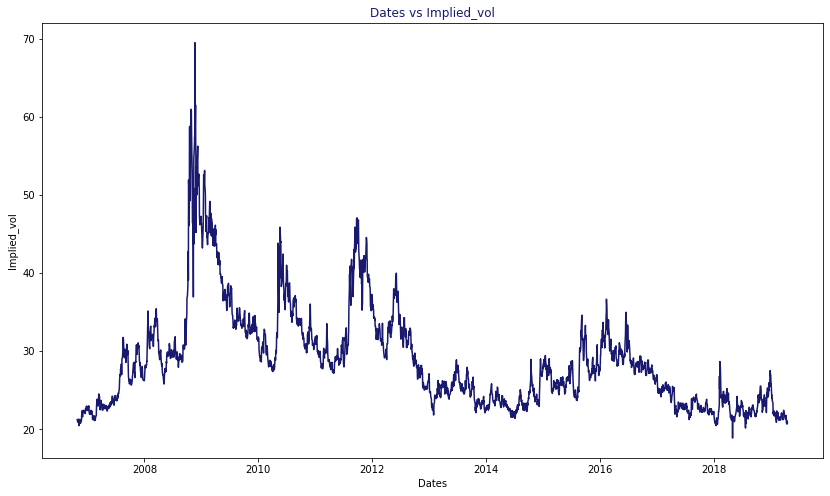

Strike = 80, Duration = 1Y


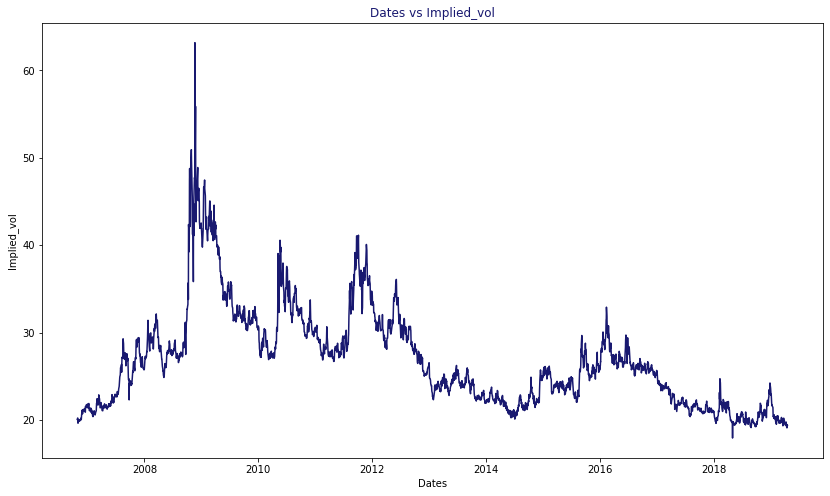

Strike = 80, Duration = 18M


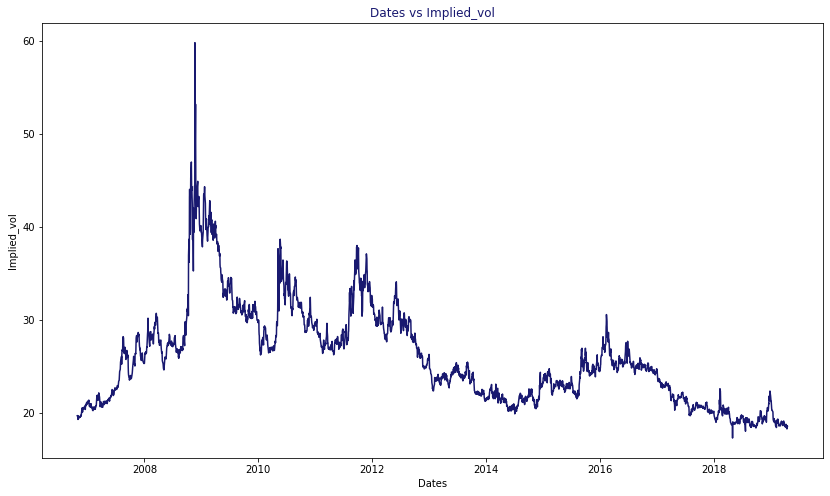

Strike = 80, Duration = 2Y


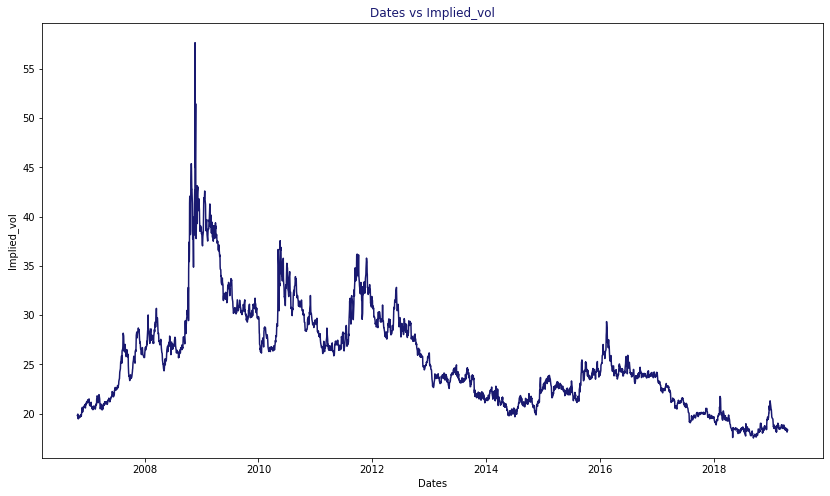

Strike = 80, Duration = 3Y


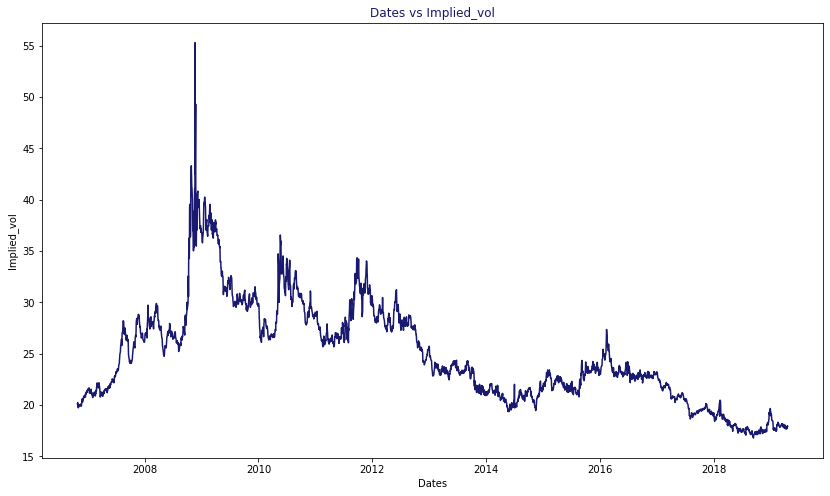

Strike = 90, Duration = 6M


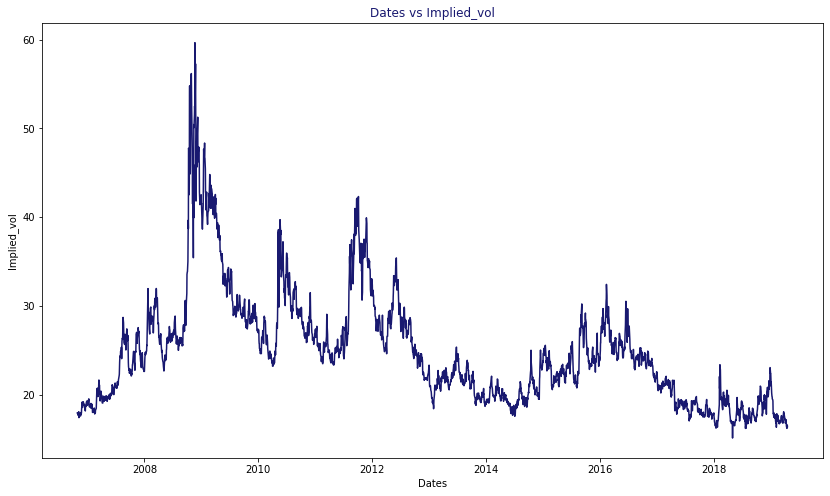

Strike = 90, Duration = 1Y


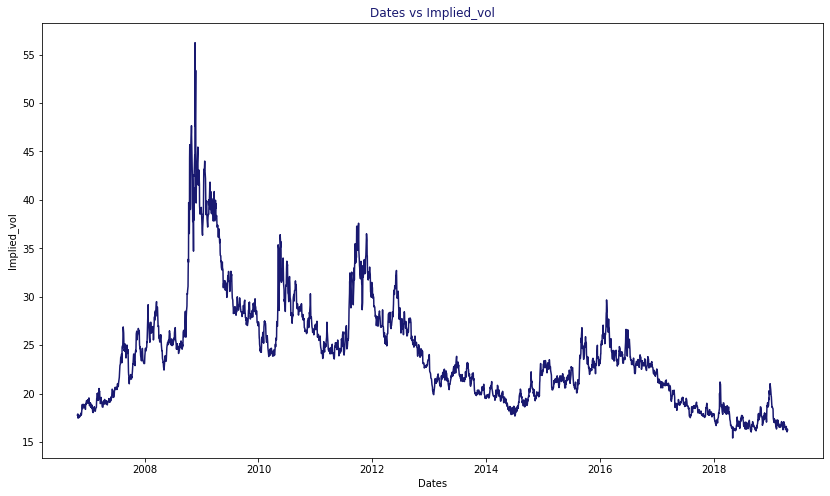

Strike = 90, Duration = 18M


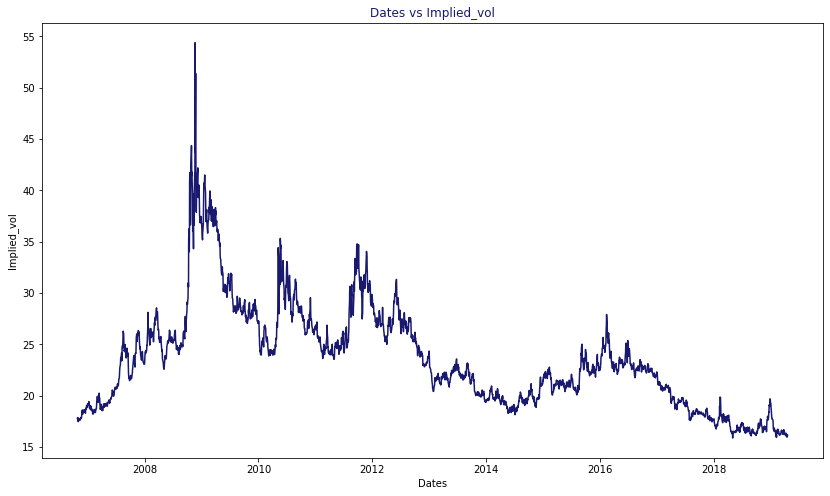

Strike = 90, Duration = 2Y


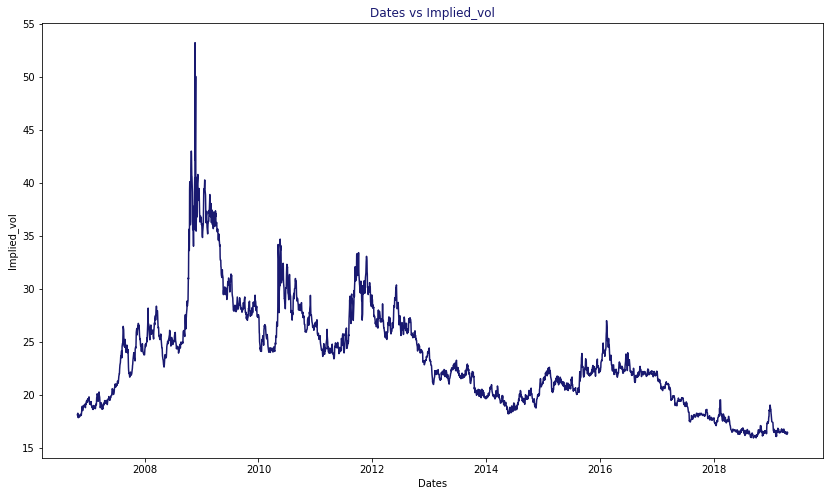

Strike = 90, Duration = 3Y


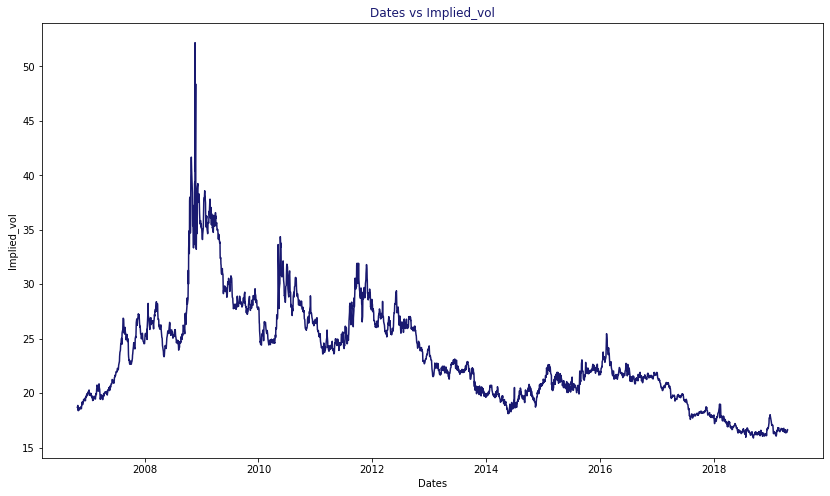

Strike = 100, Duration = 6M


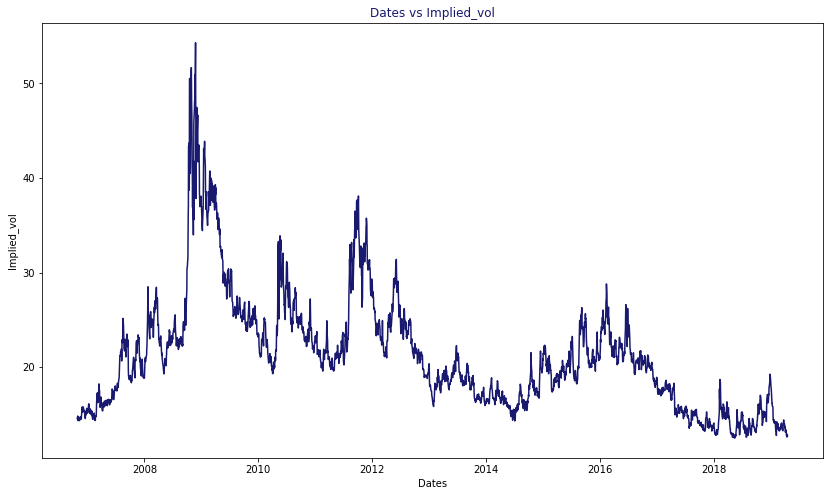

Strike = 100, Duration = 1Y


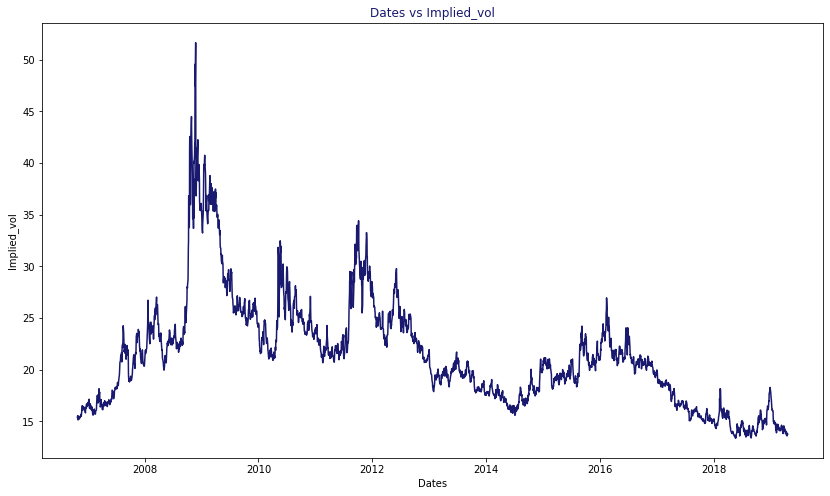

Strike = 100, Duration = 18M


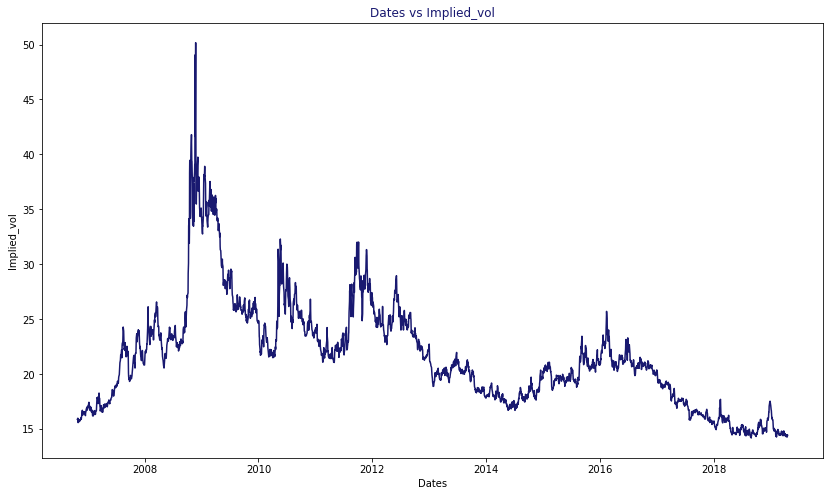

Strike = 100, Duration = 2Y


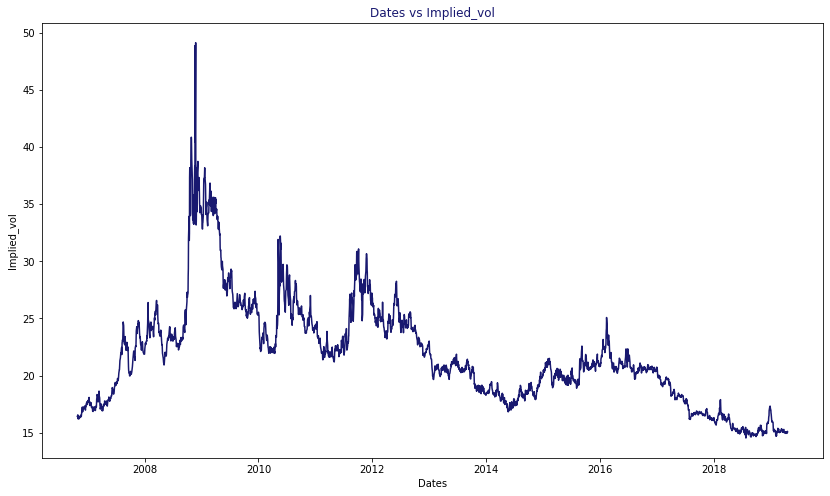

Strike = 100, Duration = 3Y


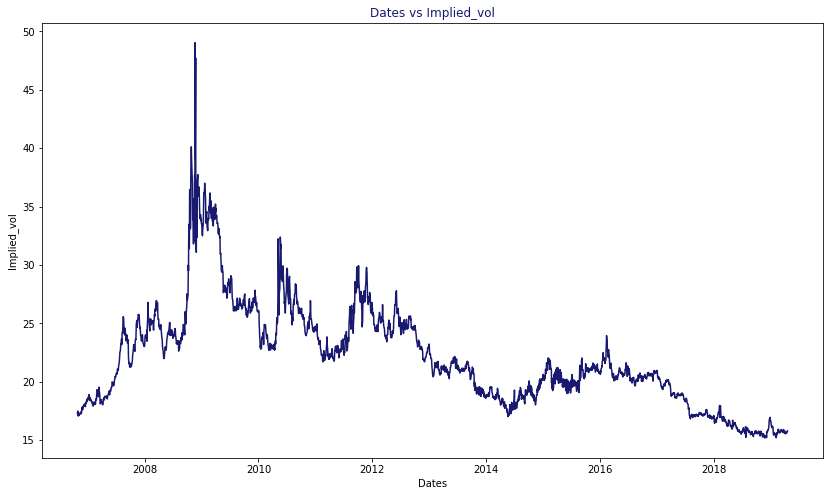

Strike = 110, Duration = 6M


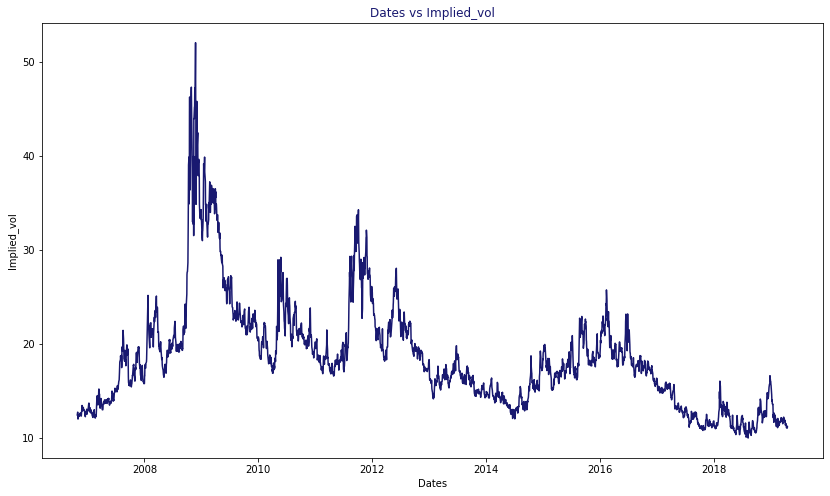

Strike = 110, Duration = 1Y


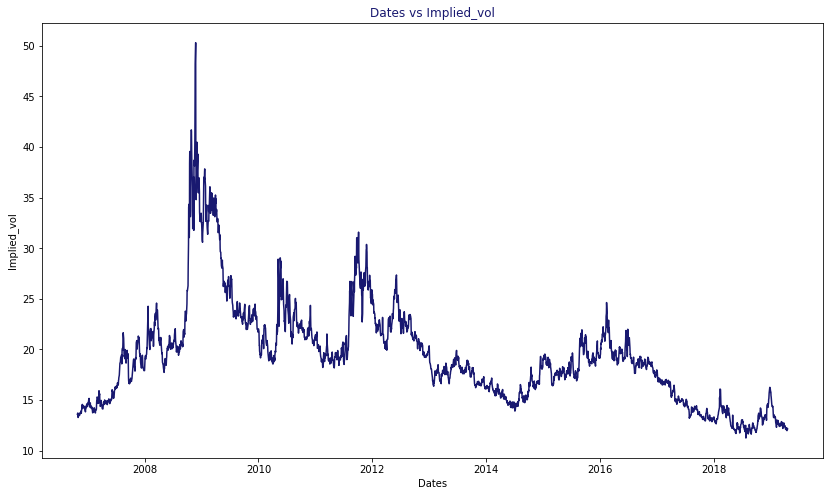

Strike = 110, Duration = 18M


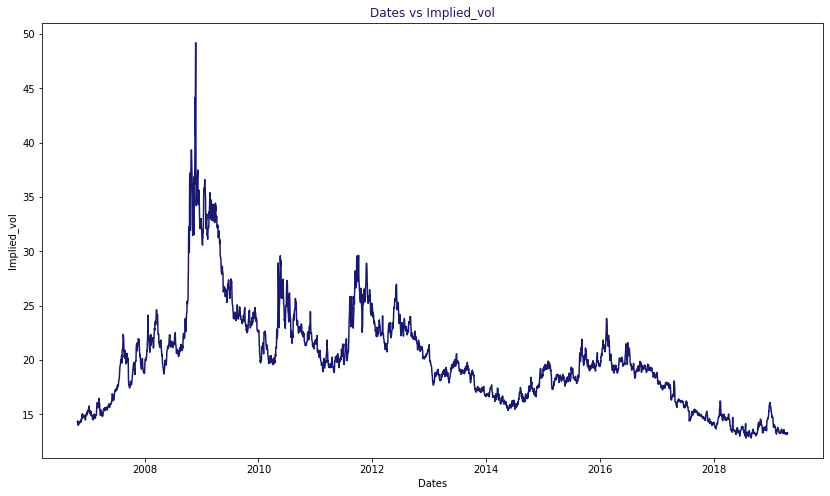

Strike = 110, Duration = 2Y


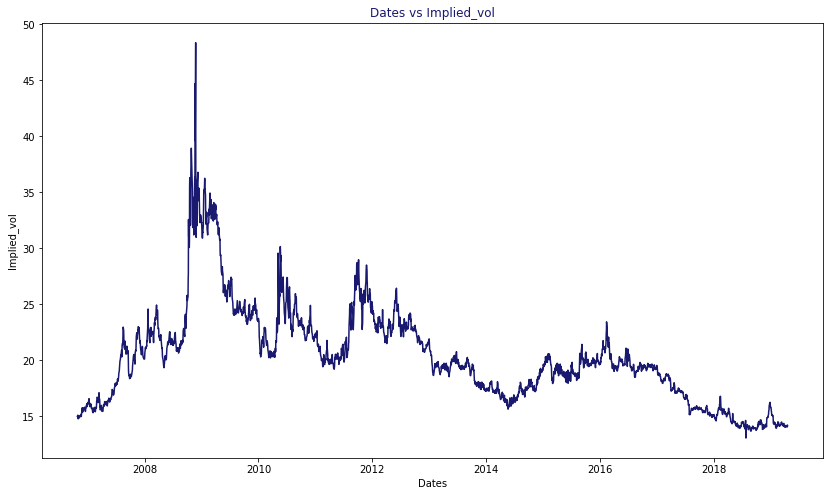

Strike = 110, Duration = 3Y


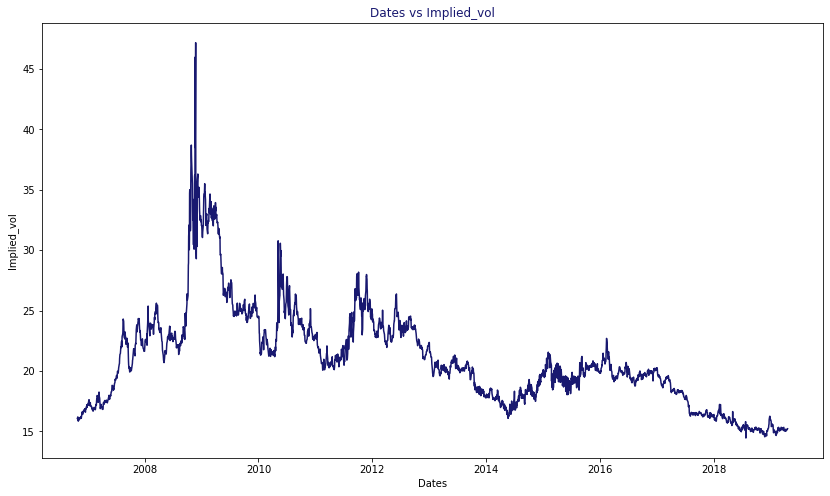

Strike = 120, Duration = 6M


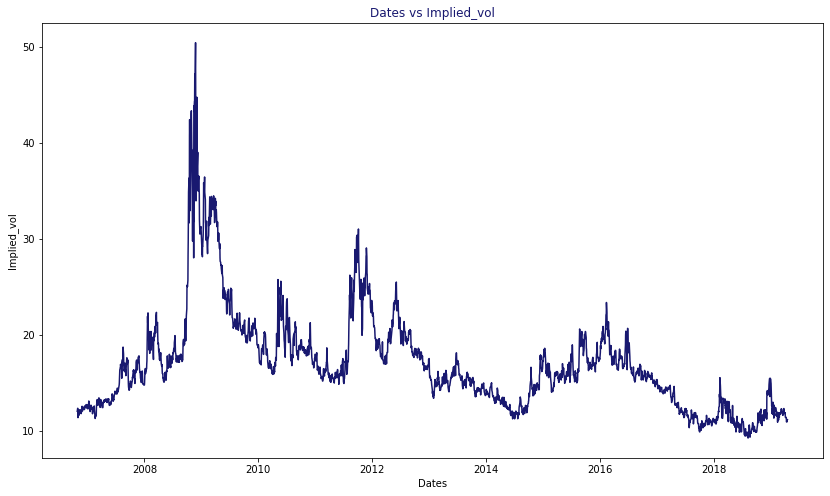

Strike = 120, Duration = 1Y


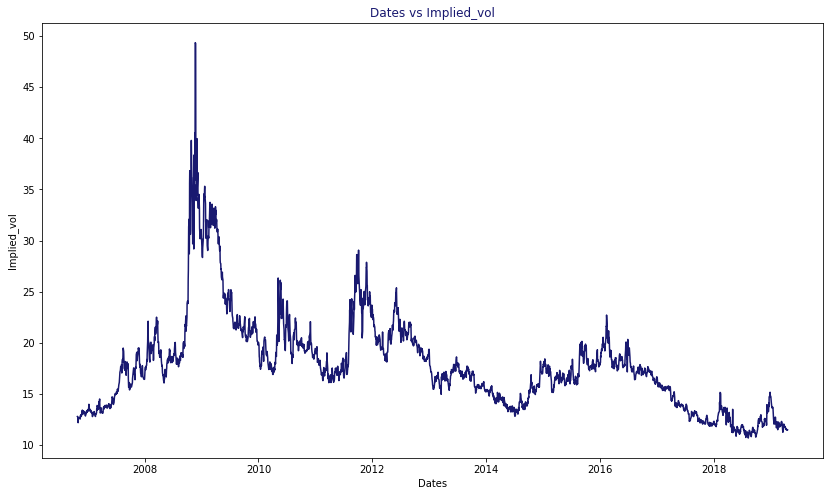

Strike = 120, Duration = 18M


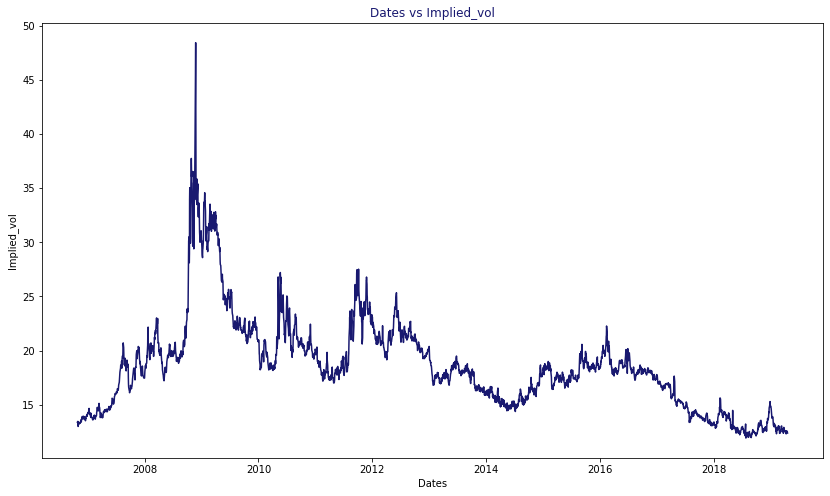

Strike = 120, Duration = 2Y


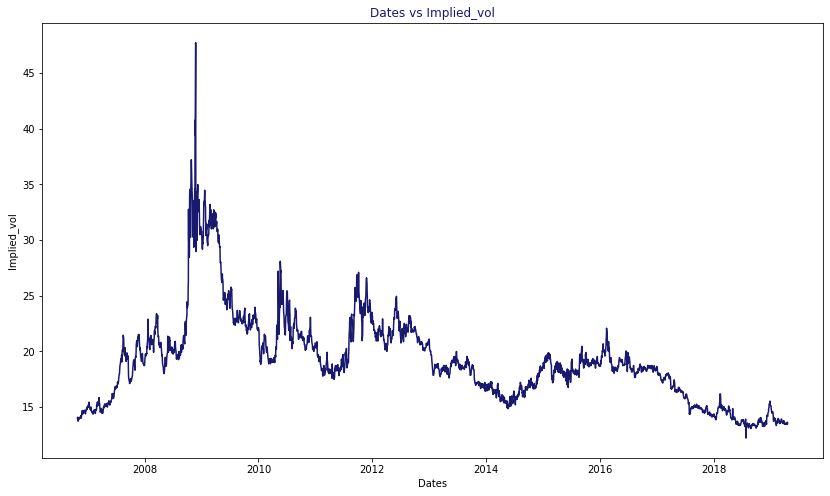

Strike = 120, Duration = 3Y


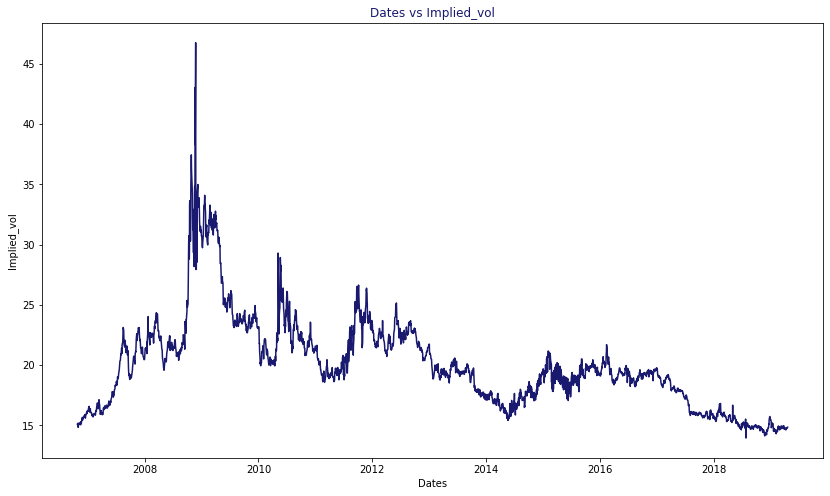

In [73]:
from implied_vol_prediction.src.graphs import graph_df_strike_duration_selection

for s in strikes: 
    for d in durations: 
        if not((d == "3Y") and (s == 140)): 
            graph_df_strike_duration_selection(sx5e_daily, d, s, "Dates", "Implied_vol")

## Plot same maturity options with different strike values, spots_iv_index_spx_ai_daily

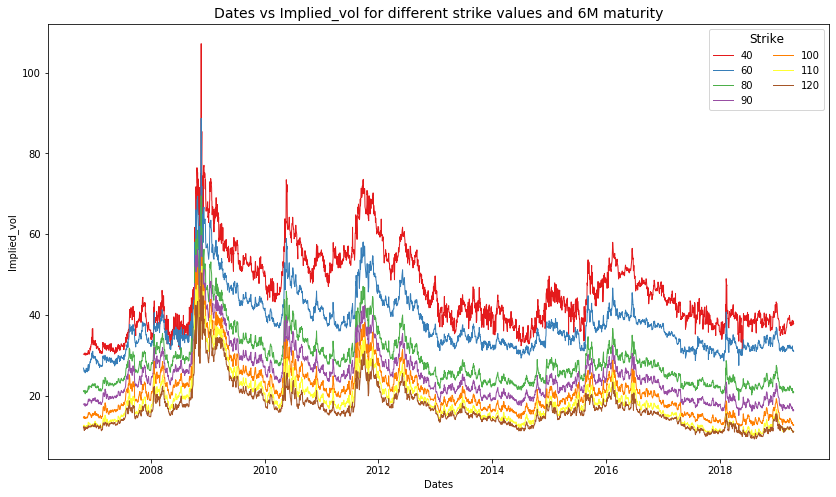

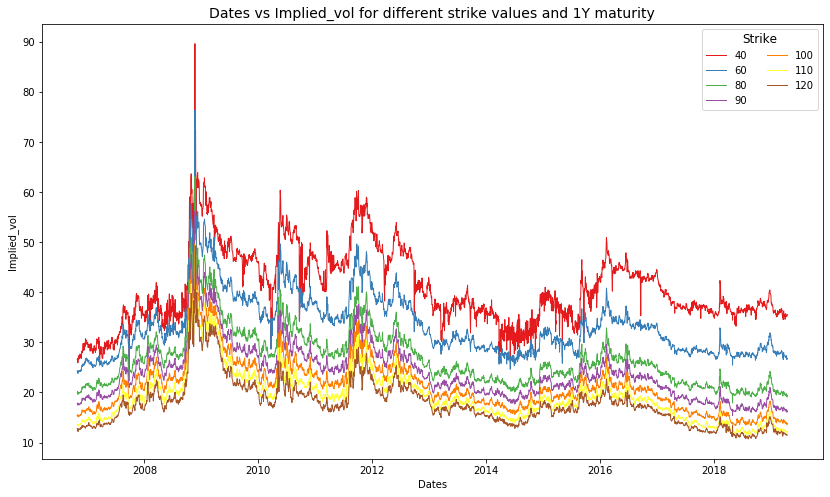

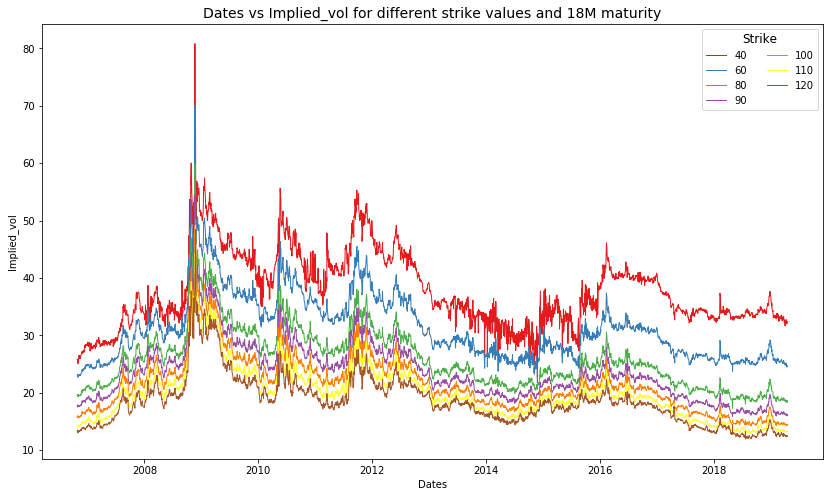

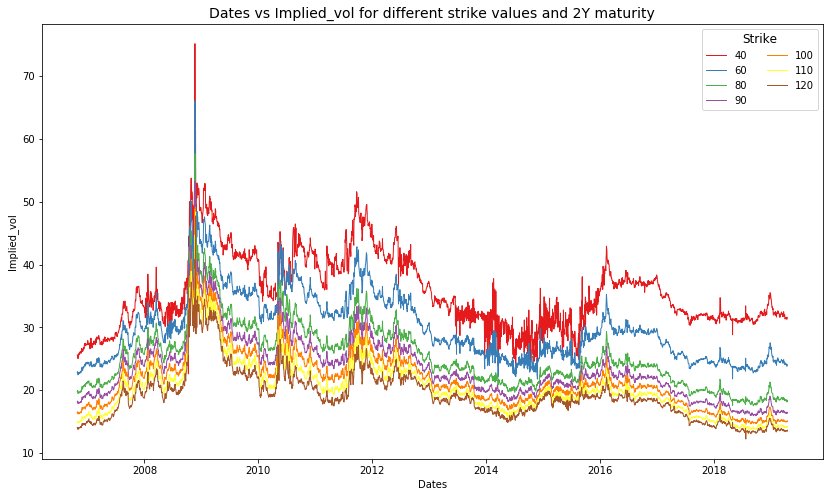

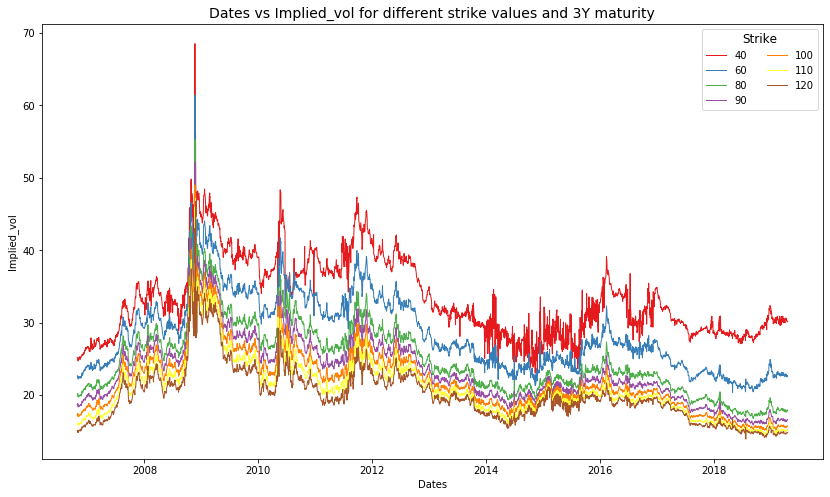

In [88]:
from implied_vol_prediction.src.graphs import plot_different_strike_values, plot_different_duration_values

for d in ["6M", "1Y", "18M", "2Y", "3Y"]: 
    plot_different_strike_values(sx5e_daily, d, "Dates", "Implied_vol")

## Plot same strike options with different maturities values, spots_iv_index_spx_ai_daily

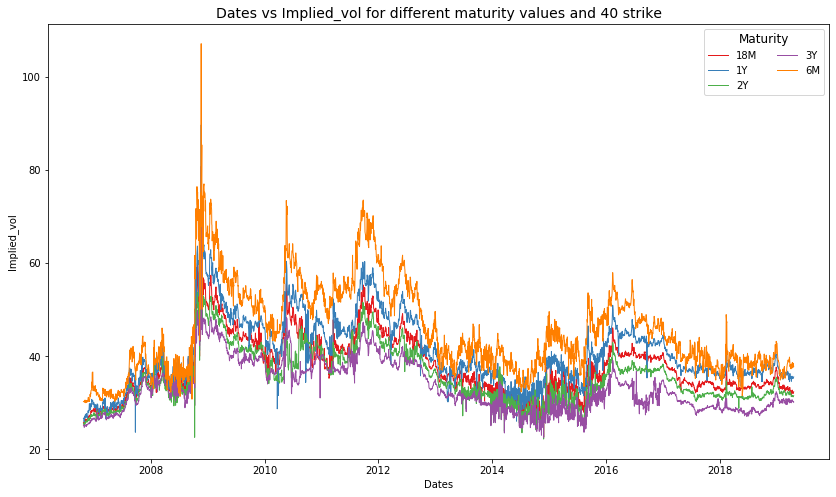

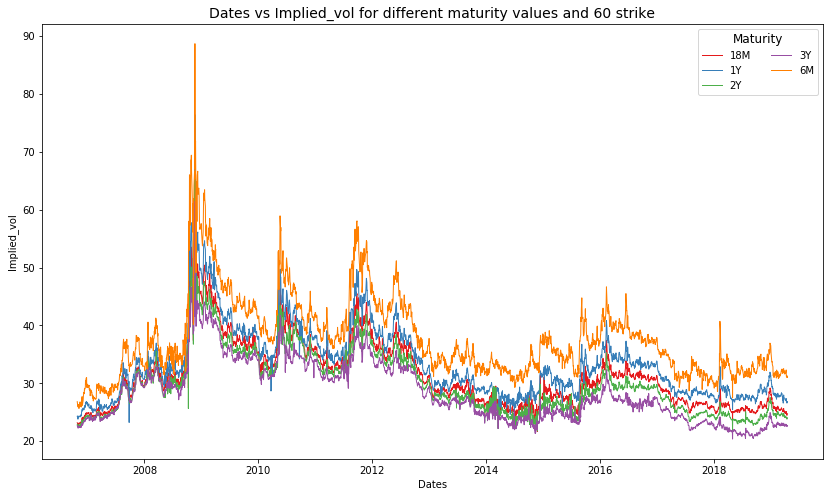

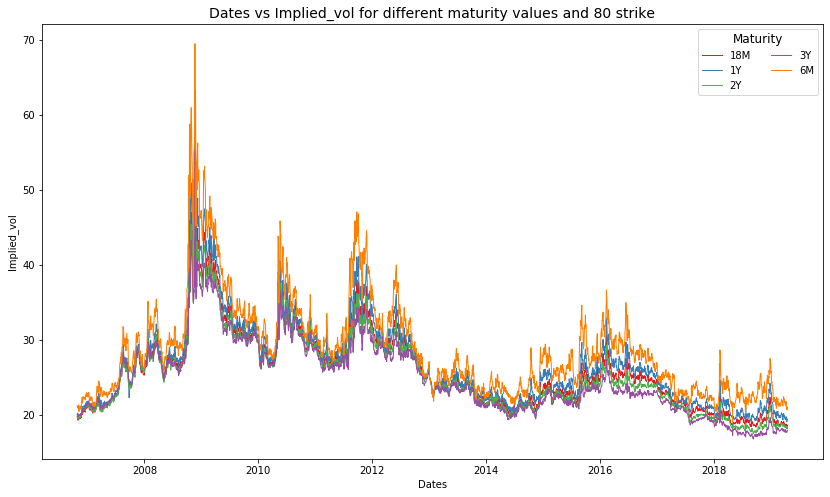

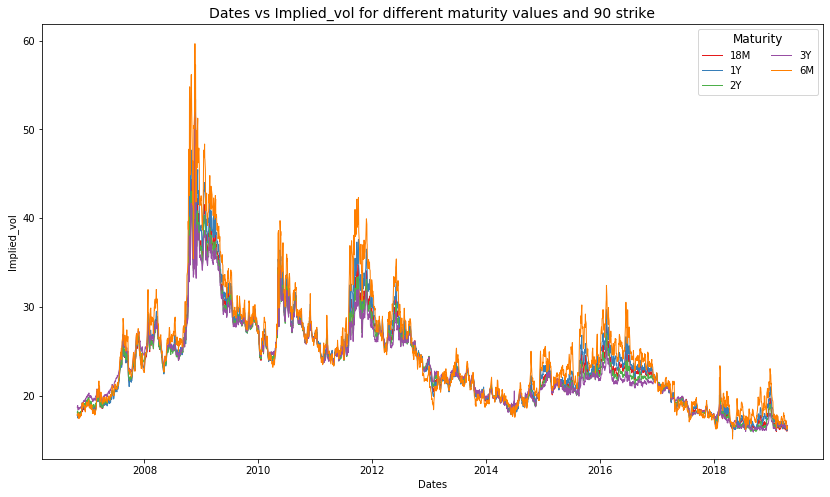

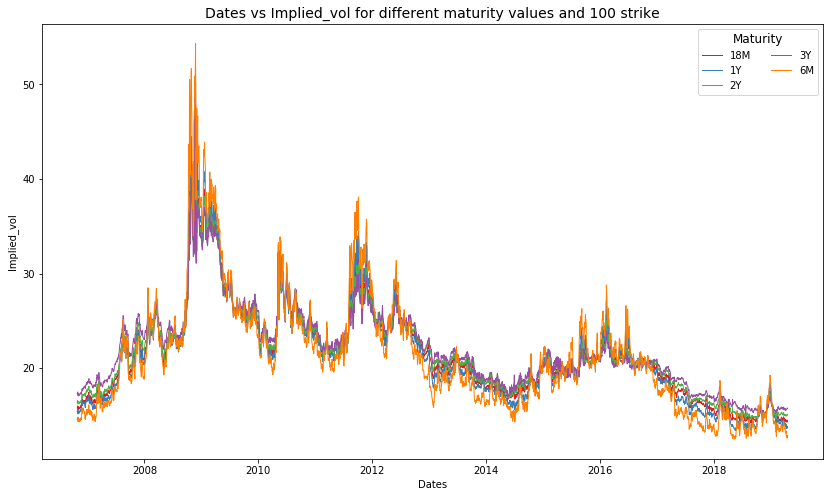

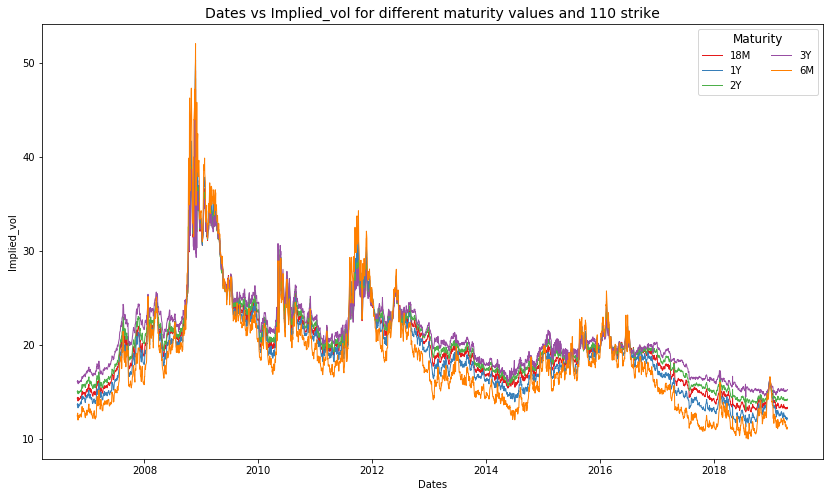

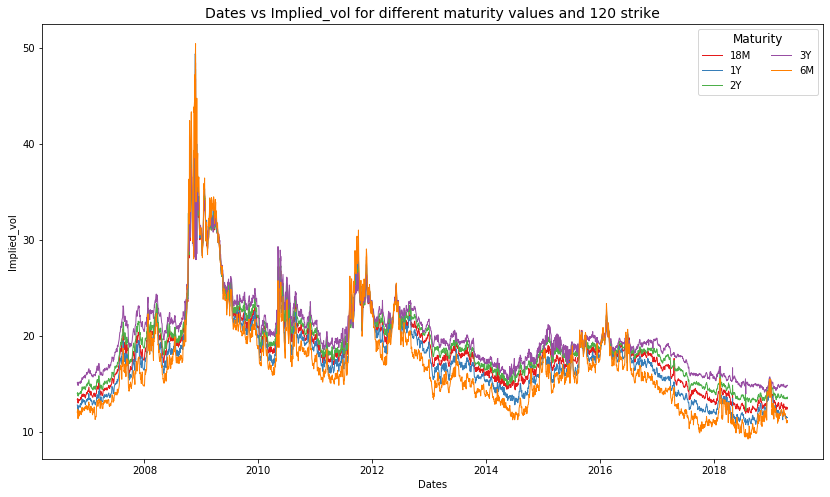

In [90]:
for s in strikes: 
    plot_different_duration_values(sx5e_daily, s, "Dates", "Implied_vol")

# Graph the change in implied volatility for all strike-maturity options 

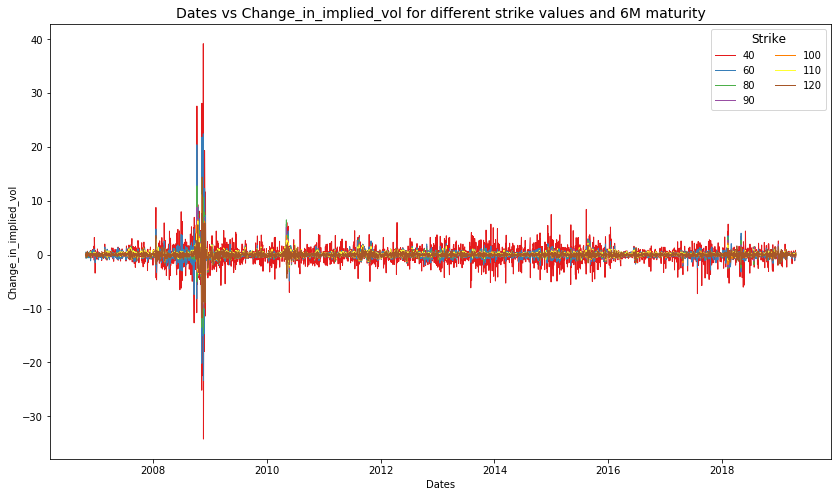

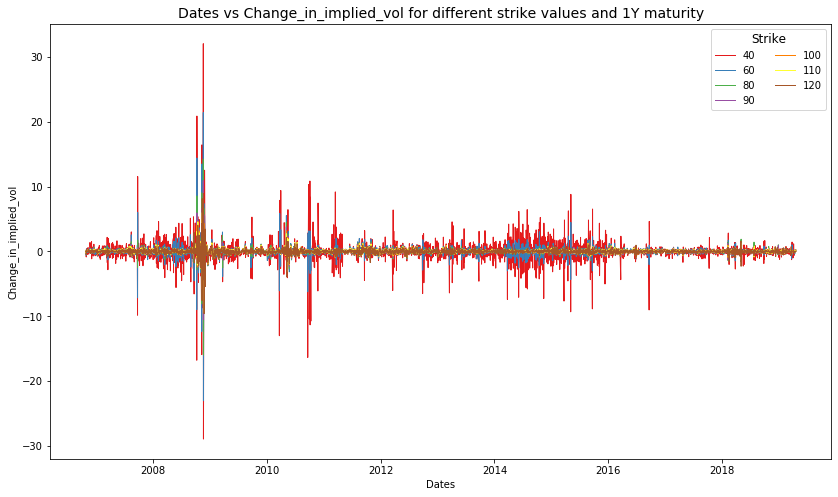

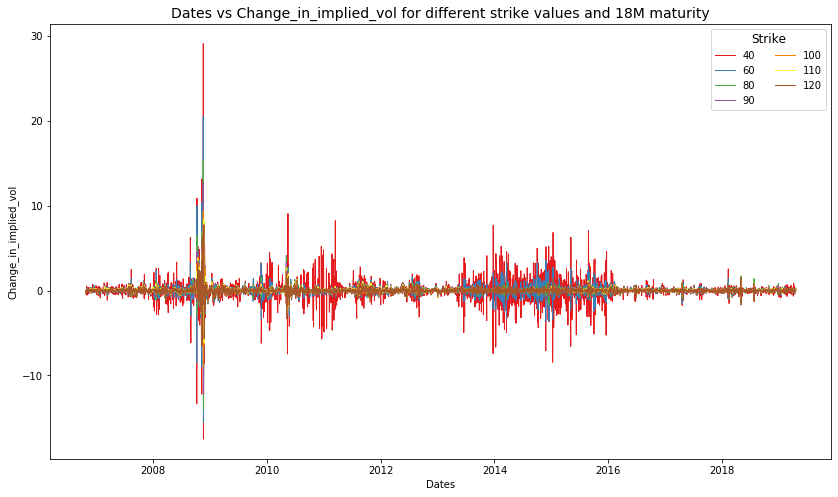

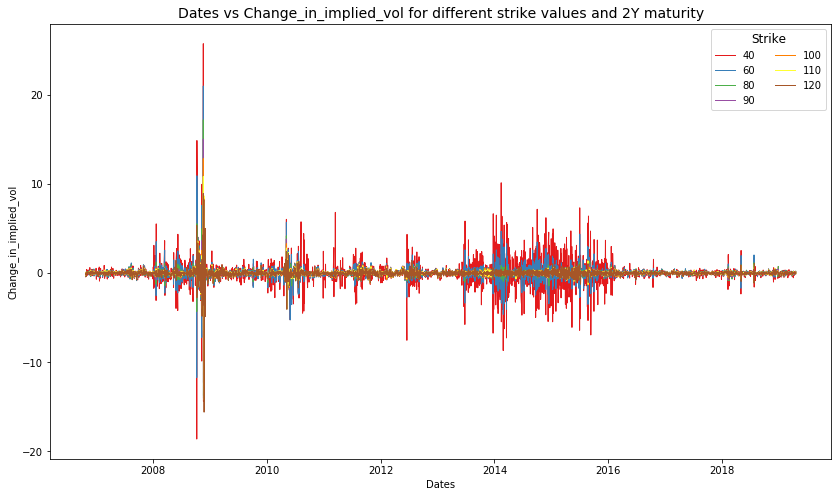

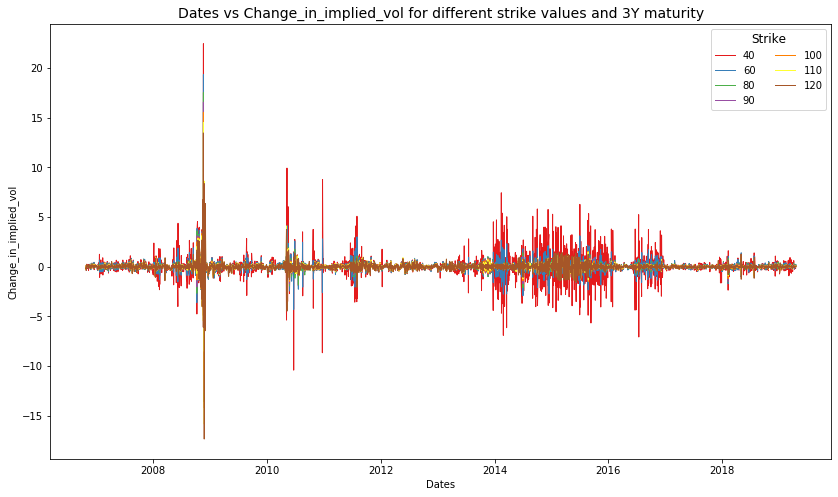

In [12]:
from implied_vol_prediction.src.graphs import plot_different_strike_values, plot_different_duration_values

for d in ["6M", "1Y", "18M", "2Y", "3Y"]: 
    plot_different_strike_values(sx5e_daily, d, "Dates", "Change_in_implied_vol")

# Cross correlation tables 
## 1) Pearson correlation
Correlation / SD of each option 

In [92]:
sx5e_daily.head()

,Dates,Spot t,Spot t-1,Volatility,Duration,Strike,Implied_vol,Change_in_implied_vol
0,2019-04-18,3477.73,3477.73,37.8552,6M,40,37.855200,-0.096000
1,2019-04-17,3477.73,3463.36,37.9512,6M,40,37.981383,-0.480417
2,2019-04-16,3463.36,3450.46,38.4618,6M,40,38.487976,0.818576
3,2019-04-15,3450.46,3447.83,37.6694,6M,40,37.675154,0.125054
4,2019-04-12,3447.83,3435.34,37.5501,6M,40,37.577979,0.098279


In [93]:
from implied_vol_prediction.src.data_analysis import create_corr_table

pearson_corr_table = create_corr_table(sx5e_daily)

In [94]:
pearson_corr_table[(pearson_corr_table["Pearson correlation"] >= 0.8)].sort_values(by=['Pearson correlation'], 
                                                                                   ascending=False)

,Duration1,Strike1,Duration2,Strike2,Pearson correlation
395,2Y,90,3Y,90,0.968397
410,2Y,100,3Y,100,0.957783
394,2Y,90,3Y,80,0.956857
409,2Y,100,3Y,90,0.951220
396,2Y,90,3Y,100,0.947363
...,...,...,...,...,...
379,2Y,80,3Y,60,0.806335
327,18M,120,1Y,110,0.806300
64,1Y,90,6M,60,0.804820
284,18M,100,3Y,100,0.803614


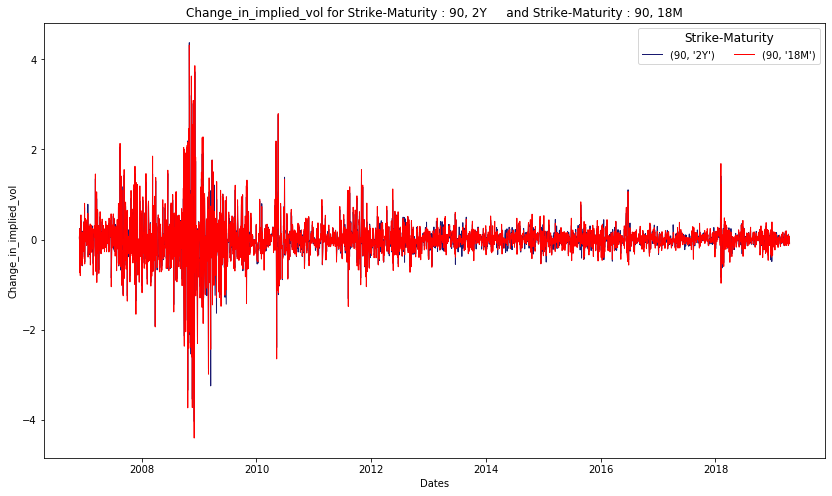

In [96]:
from implied_vol_prediction.src.graphs import double_graph

double_graph(spots_iv_index_spx_ai_daily, "2Y", 90, "18M", 90, "Dates", "Change_in_implied_vol")

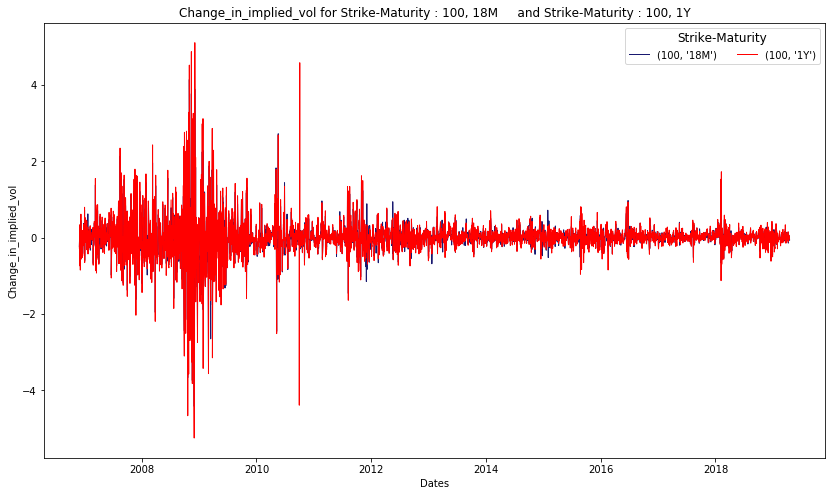

In [97]:
double_graph(spots_iv_index_spx_ai_daily, "18M", 100, "1Y", 100, "Dates", "Change_in_implied_vol")